In [ ]:
#all required libraries:
import sounddevice as sd
from scipy.io.wavfile import write
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

ModuleNotFoundError: No module named 'sounddevice'

In [ ]:
!apt install libportaudio2
!pip install sounddevice
!pip install scipy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (91.6 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.4) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/li

In [ ]:
import sounddevice as sd           #to record our sound and create numpy arrays
from scipy.io.wavfile import write #to take the numpy array and save it as wav file

# Data Collection

In [ ]:
def record_wake_word(save_path,n_times=100):
  input("To start audio recording press Enter: ")
  for i in range(n_times):
    fs= 44100
    seconds= 2
    myrecording=sd.rec(int(seconds*fs),samplerate=fs,channels=2)
    sd.wait()
    write(save_path + str(i)+ ".wav" ,fs,myrecording)
    input(f"Press to record next or to stop press ctrl+c({i+1}/{n_times})")

def record_background_noise(save_path,n_times=100):
  input("To start audio recording press Enter: ")
  for i in range(n_times):
    fs= 44100
    seconds= 2
    myrecording=sd.rec(int(seconds*fs),samplerate=fs,channels=2)
    sd.wait()
    write(save_path + str(i)+ ".wav" ,fs,myrecording)
    input(f"Current;y on : {i+1}/{n_times}")

In [ ]:
print("Record the wake word (Samin): \n ",100)
record_wake_word(r"C:\Users\Lenovo\Desktop\Wakw word Samin\Samin")

Record the wake word (Samin): 
  100


To start audio recording press Enter:  
Press to record next or two stop press ctrl+c(1/100) 
Press to record next or two stop press ctrl+c(2/100) 
Press to record next or two stop press ctrl+c(3/100) 
Press to record next or two stop press ctrl+c(4/100) 
Press to record next or two stop press ctrl+c(5/100) 
Press to record next or two stop press ctrl+c(6/100) 
Press to record next or two stop press ctrl+c(7/100) 
Press to record next or two stop press ctrl+c(8/100) 
Press to record next or two stop press ctrl+c(9/100) 
Press to record next or two stop press ctrl+c(10/100) 
Press to record next or two stop press ctrl+c(11/100) 
Press to record next or two stop press ctrl+c(12/100) 
Press to record next or two stop press ctrl+c(13/100) 
Press to record next or two stop press ctrl+c(14/100) 
Press to record next or two stop press ctrl+c(15/100) 
Press to record next or two stop press ctrl+c(16/100) 
Press to record next or two stop press ctrl+c(17/100) 
Press to record next or two stop p

In [ ]:
record_background_noise(r"C:\Users\Lenovo\Desktop\Wakw word Samin\Noise",100)

To start audio recording press Enter:  
Current;y on : 1/100 
Current;y on : 2/100 
Current;y on : 3/100 
Current;y on : 4/100 
Current;y on : 5/100 
Current;y on : 6/100 
Current;y on : 7/100 
Current;y on : 8/100 
Current;y on : 9/100 
Current;y on : 10/100 
Current;y on : 11/100 
Current;y on : 12/100 
Current;y on : 13/100 
Current;y on : 14/100 
Current;y on : 15/100 
Current;y on : 16/100 
Current;y on : 17/100 
Current;y on : 18/100 
Current;y on : 19/100 
Current;y on : 20/100 
Current;y on : 21/100 
Current;y on : 22/100 
Current;y on : 23/100 
Current;y on : 24/100 
Current;y on : 25/100 
Current;y on : 26/100 
Current;y on : 27/100 
Current;y on : 28/100 
Current;y on : 29/100 
Current;y on : 30/100 
Current;y on : 31/100 
Current;y on : 32/100 
Current;y on : 33/100 
Current;y on : 34/100 
Current;y on : 35/100 
Current;y on : 36/100 
Current;y on : 37/100 
Current;y on : 38/100 
Current;y on : 39/100 
Current;y on : 40/100 
Current;y on : 41/100 
Current;y on : 42/100 
Cur

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

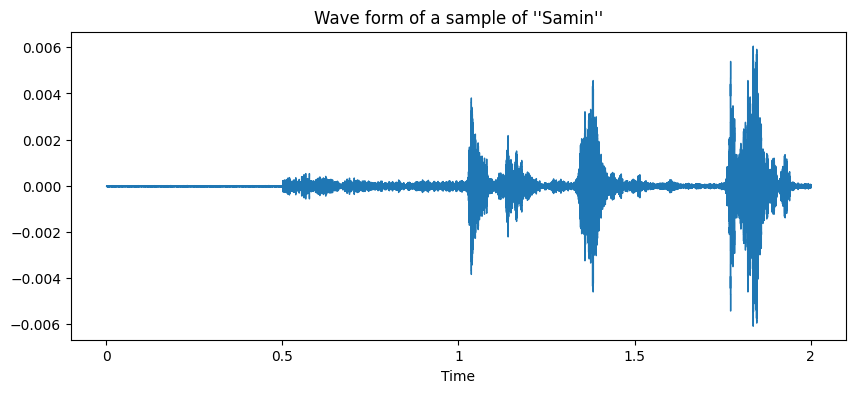

Shape of mfcc: (40, 87)


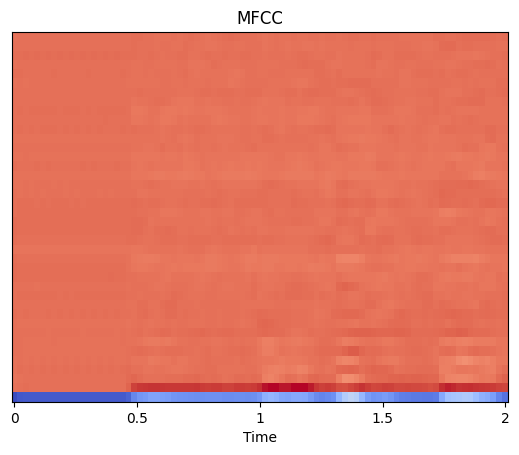

In [ ]:
sample ="/content/drive/MyDrive/Audio deep/Wakw word Samin/Samin/Samin0.wav"
data, sample_rate = librosa.load(sample)
plt.figure(figsize=(10, 4))
plt.title("Wave form of a sample of ''Samin''")
librosa.display.waveshow(data, sr=sample_rate)
plt.show()
mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print("Shape of mfcc:", mfccs.shape)
plt.title("MFCC")
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.show()

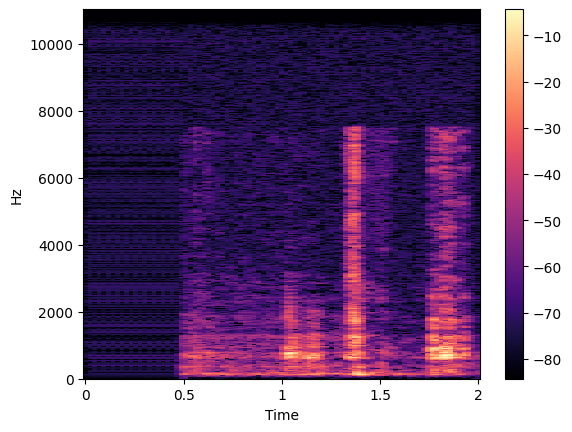

In [ ]:
data, sample_rate = librosa.load(sample)
data= librosa.stft(data)
Xdb = librosa.amplitude_to_db(abs(data))
librosa.display.specshow(Xdb,sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

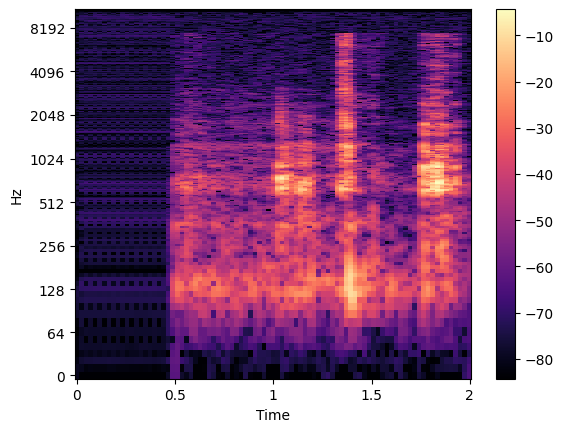

In [ ]:
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

# Model 1) FC

In [7]:
def noise(d):
  noise_factor=0.005
  noise = np.random.randn(len(d))
  augmented_data = d + noise_factor * noise
  augmented_data = augmented_data.astype(type(d[0]))
  return augmented_data

def time_shift(d, sampling_rate=16000, shift_max=0.5, shift_direction='both'):
  shift= np.random.randint(-sampling_rate * shift_max, sampling_rate * shift_max)
  if shift_direction == 'right':
    shift= abs(shift)
  elif shift_direction == 'both':
    direction= np.random.randint(0, 2)
    if direction == 1:
      shift= -shift
  augmented_data = np.roll(d, shift)
  if shift>0:augmented_data[:shift] = 0
  else: augmented_data[shift:] = 0
  return augmented_data

def augment_pitch(d):
  pitch_factor=2
  n_steps = int(pitch_factor * 12)
  return librosa.effects.pitch_shift(d,sr=16000,n_steps=n_steps)

def augment_speed(d, speed_factor=1.2):
  return librosa.effects.time_stretch(d,rate=speed_factor)


augmentation_functions = [noise,time_shift,augment_pitch,augment_speed]
def apply_random_augmentation(d):
  augmentation_function = random.choice(augmentation_functions)
  augmented_audio = augmentation_function(d)
  return augmented_audio

In [ ]:
data=[]
noise_path='/content/drive/MyDrive/Audio deep/Wakw word Samin/Noise/'
wake_path='/content/drive/MyDrive/Audio deep/Wakw word Samin/Samin/'
data_path_dict = { 0:[noise_path + file_path for file_path in os.listdir(noise_path)],
                   1:[wake_path + file_path for file_path in os.listdir(wake_path)]}

for class_label,list_of_files in data_path_dict.items():
  for single_file in list_of_files:
    data_ , sample_rate= librosa.load(single_file)
    mfccs= librosa.feature.mfcc(y=data_, sr=sample_rate, n_mfcc=40)
    mfcc_processed= np.mean(mfccs.T,axis=0)
    data.append([mfcc_processed,class_label])
#Data Augmentation
    augmented_sample=apply_random_augmentation(data_)
    mfccs= librosa.feature.mfcc(y=augmented_sample, sr=sample_rate, n_mfcc=40)
    mfcc_processed= np.mean(mfccs.T,axis=0)
    data.append([mfcc_processed,class_label])

  print(f"Successfully Preprocessed Class Label {class_label}")

df = pd.DataFrame(data, columns=["feature", "class_label"])
df.to_pickle("/content/drive/MyDrive/Audio deep/Wakw word Samin/audio_data.csv")

Successfully Preprocessed Class Label 0
Successfully Preprocessed Class Label 1


In [ ]:
df.shape # before data augmentation it was (200,2)

(400, 2)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Audio deep/Wakw word Samin/audio_data.csv')
X = df["feature"].values
X = np.concatenate(X, axis=0).reshape(len(X), 40)
y = np.array(df["class_label"].tolist())
y = to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Dense(256, input_shape=X_train[0].shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               10496     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print("Model Score: \n")
history= model.fit(X_train, y_train,batch_size=32,epochs=110,validation_split=0.1)
model.save("saved_model/WWD.h5")
score= model.evaluate(X_test, y_test)
print(score)

Model Score: 

Epoch 1/110
9/9 [==============================] - 1s 33ms/step - loss: 0.0328 - accuracy: 0.9861 - val_loss: 3.4940 - val_accuracy: 0.9062
Epoch 2/110
9/9 [==============================] - 0s 9ms/step - loss: 0.0850 - accuracy: 0.9792 - val_loss: 4.0793 - val_accuracy: 0.9062
Epoch 3/110
9/9 [==============================] - 0s 10ms/step - loss: 0.0462 - accuracy: 0.9896 - val_loss: 4.2125 - val_accuracy: 0.8750
Epoch 4/110
9/9 [==============================] - 0s 10ms/step - loss: 0.0875 - accuracy: 0.9861 - val_loss: 4.1758 - val_accuracy: 0.8750
Epoch 5/110
9/9 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9861 - val_loss: 4.1384 - val_accuracy: 0.9062
Epoch 6/110
9/9 [==============================] - 0s 9ms/step - loss: 0.0093 - accuracy: 0.9965 - val_loss: 3.7219 - val_accuracy: 0.9062
Epoch 7/110
9/9 [==============================] - 0s 7ms/step - loss: 0.0155 - accuracy: 0.9896 - val_loss: 3.4932 - val_accuracy: 0.9062
Epoch 8/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.9000
[0.45661887526512146, 0.8999999761581421]


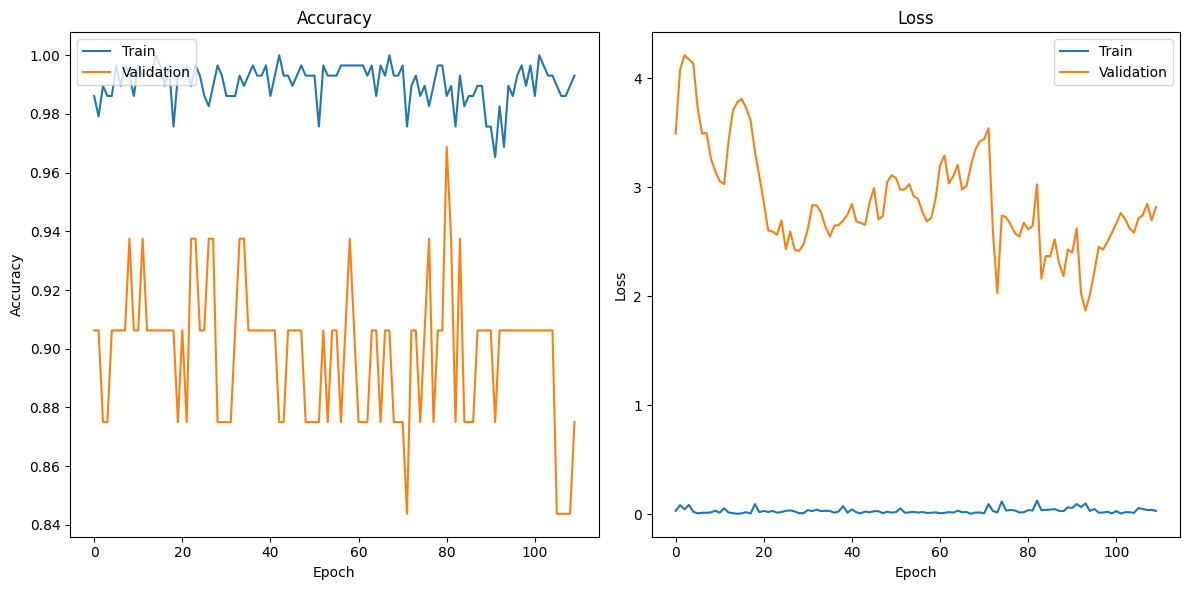

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()

Model Classification Report: 

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.87      0.92      0.89        36

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80



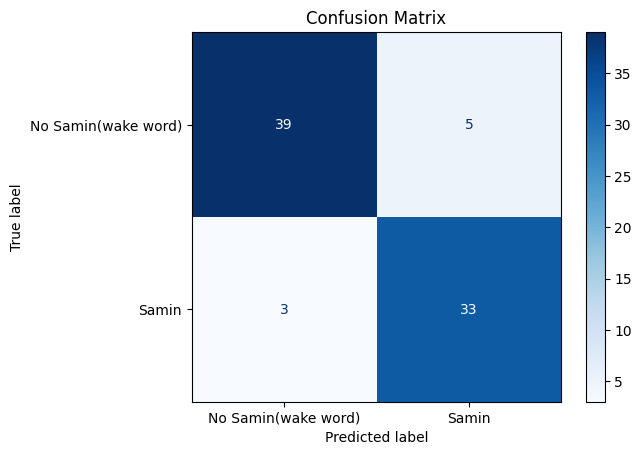

In [ ]:
print("Model Classification Report: \n")
y_pred =np.argmax(model.predict(X_test), axis=1)
cm= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Samin(wake word)', 'Samin'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Model 2) CNN

In [5]:
import os
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD

In [9]:
data=[]
labels= []
noise_path= '/content/drive/MyDrive/Audio deep/Wakw word Samin/Noise/'
wake_path= '/content/drive/MyDrive/Audio deep/Wakw word Samin/Samin/'
data_path_dict = { 0: [noise_path + file_path for file_path in os.listdir(noise_path)],
                   1: [wake_path + file_path for file_path in os.listdir(wake_path)]}

import random

def load_audio_files_with_augmentation(data_path_dict):
    augmented_data=[]
    augmented_labels=[]
    for label, paths in data_path_dict.items():
        for path in paths:
            audio, sr= librosa.load(path, sr=22050)
            augmented_data.append(audio)
            augmented_labels.append(label)
#Data Augmentation
            augmented_sample=apply_random_augmentation(audio)
            augmented_data.append(augmented_sample)
            augmented_labels.append(label)
    return augmented_data, augmented_labels

data_augmented, labels_augmented= load_audio_files_with_augmentation(data_path_dict)
data.extend(data_augmented)
labels.extend(labels_augmented)

def extract_features(data, sr=22050, n_mels=128, n_fft=2048, hop_length=512, fixed_length=400):
    features=[]
    for audio in data:
        mel_spectrogram= librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
        log_mel_spectrogram= librosa.power_to_db(mel_spectrogram, ref=np.max)

        if log_mel_spectrogram.shape[1] < fixed_length:
            pad_width= fixed_length-log_mel_spectrogram.shape[1]
            log_mel_spectrogram= np.pad(log_mel_spectrogram,((0,0),(0,pad_width)),mode='constant')
        else:   log_mel_spectrogram= log_mel_spectrogram[:,:fixed_length]

        features.append(log_mel_spectrogram)
    return np.array(features)

features= extract_features(data)
features= features[..., np.newaxis]
encoder= LabelEncoder()
labels_encoded= encoder.fit_transform(labels)
labels_categorical= to_categorical(labels_encoded)
X_train,X_test,y_train,y_test= train_test_split(features, labels_categorical, test_size=0.2, random_state=42)

In [19]:
def build_model(input_shape):
    model2 = Sequential()
    model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(BatchNormalization())
    model2.add(Conv2D(64, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(BatchNormalization())
    model2.add(Conv2D(128, (3, 3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(BatchNormalization())
    model2.add(Flatten())
    model2.add(Dense(128, activation='relu'))
    model2.add(Dropout(0.5))
    model2.add(Dense(2, activation='softmax'))
    return model2

input_shape= (features.shape[1], features.shape[2], 1)
model2= build_model(input_shape)
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history2= model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 3s 103ms/step - loss: 17.1597 - accuracy: 0.5063 - val_loss: 5.7132 - val_accuracy: 0.4500
Epoch 2/100
10/10 [==============================] - 1s 62ms/step - loss: 3.2695 - accuracy: 0.5969 - val_loss: 1.2012 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 1s 60ms/step - loss: 1.6881 - accuracy: 0.5844 - val_loss: 0.9156 - val_accuracy: 0.4625
Epoch 4/100
10/10 [==============================] - 1s 63ms/step - loss: 0.6786 - accuracy: 0.6250 - val_loss: 0.7560 - val_accuracy: 0.4250
Epoch 5/100
10/10 [==============================] - 1s 63ms/step - loss: 0.6433 - accuracy: 0.5844 - val_loss: 0.7424 - val_accuracy: 0.4750
Epoch 6/100
10/10 [==============================] - 1s 57ms/step - loss: 0.6074 - accuracy: 0.5938 - val_loss: 0.7284 - val_accuracy: 0.4500
Epoch 7/100
10/10 [==============================] - 1s 57ms/step - loss: 0.5670 - accuracy: 0.6562 - val_loss: 0.7009 - val_accuracy: 0.4625
Epoc

In [21]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 398, 32)      320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 199, 32)       0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 63, 199, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 197, 64)       18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 98, 64)        0         
 ng2D)                                                           
                                                      

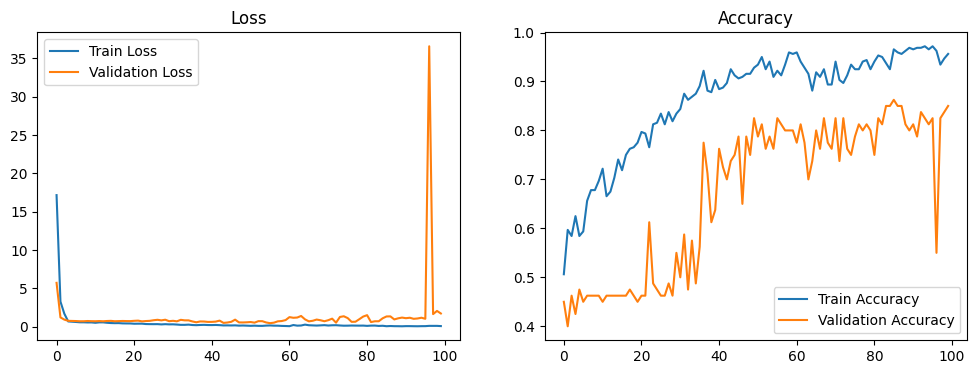

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [23]:
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.4f}')

3/3 - 0s - loss: 1.7164 - accuracy: 0.8500 - 77ms/epoch - 26ms/step
Test accuracy: 0.8500


Model Classification Report: 

3/3 [==============================] - 0s 15ms/step
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        44
           1       0.77      0.94      0.85        36

    accuracy                           0.85        80
   macro avg       0.86      0.86      0.85        80
weighted avg       0.87      0.85      0.85        80



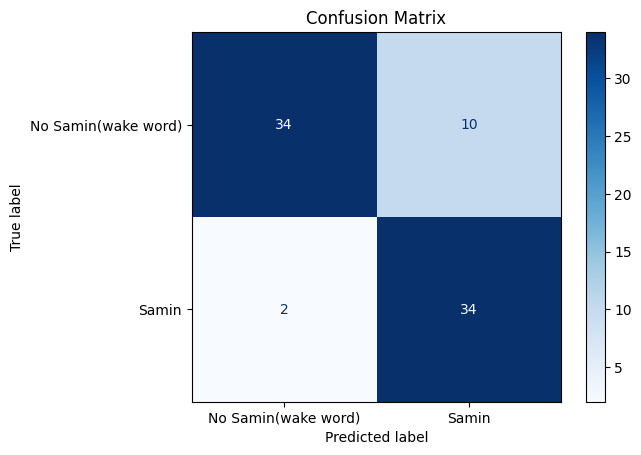

In [26]:
print("Model Classification Report: \n")
y_pred =np.argmax(model2.predict(X_test), axis=1)
cm= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(classification_report(np.argmax(y_test, axis=1), y_pred))
disp= ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Samin(wake word)', 'Samin'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()